In [1]:
# Classification

In [2]:
# La classification est une étape en apprentissage supervisé où
# il faut prédire une classe à partir d'une observation donnée,
# à partir des données d'entrée. La classification prédit une
# valeur discrète (via une probabilité).

In [3]:
# Prédire une classe

In [4]:
# Le One-Hot Encoding est une méthode pour transformer une classe
# en format numérique utilisable par un algorithme. Pour être sûr
# que le tenseur de sortie soit bien des probabilités, on utilise
# la fonction d'activation Softmax.
from torch.nn import Module, Linear, Softmax

class MLP(Module):
  def __init__(self, neurons=5, input_dim=1, classes=3):
    super(MLP, self).__init__()
    self.fc1 = Linear(input_dim, neurons)
    self.fc2 = Linear(neurons, classes)
    self.soft = Softmax(dim=-1)

  def forward(self, x):
    x = self.soft(self.fc1(x))
    return self.fc2(x)

# On appelle feature les variables décrivant une donnée, et label
# la variable que l'on cherche à prédire. 

In [5]:
# Optimiser et évaluer un modèle de classification

In [6]:
# Pour optimiser, on utilise principalement l'entropie croisée.

# Avec Pytorch
import torch
from torch import tensor
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

inputs = torch.randn(5, 10)
# Les labels doivent impérativement être sous forme d'indices
# de classe (entiers)
labels = tensor([0, 2, 1, 0, 2])

model = MLP(input_dim=10, neurons=5, classes=5)
# Utilisation de l'entropie croisée comme fonction d'activation
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-2)

model.train()
for _ in range(1000):
  optimizer.zero_grad()
  loss = criterion(model(inputs), labels)
  loss.backward()
  optimizer.step()

In [7]:
# Évaluer les performances d'un système de classification

In [8]:
# Pour chaque échantillon la prédiction peut être :
# Vrai positif et négatif : la prédiction est correcte
# Faux positif et négatif : la prédiction est fausse
# On souhaite le moins de faux positifs et négatifs et le maximum 
# de vrai positifs et négatif.
# Il existe donc 5 métriques pour mesurer l'erreur de classification.
# L'exactitude (Accuracy) : (VP+VN)/(VP+VN+FP+FN), problème en cas
# de déséquilibre des classes.
# Précision : VP/(VP+FP), ne prend pas en compte les cas négatifs.
# Rappel (Recall) : VP/(VP+FN), ne prend pas en compte les faux
# positifs, donc peut en générer à tort.
# Rapport de Faux Positifs (FPR) : FP/(FP+VN), ne prend pas en compte
# les vrais positifs (système de détection de fraude par exemple).
# F1-Score : VP/(VP+0.5(FN+FP)), moyenne harmonique entre précision
# et rappel, utile lorsque les classes sont déséquilibrées

# La terminologie ci-dessus ne s'applique qu'aux cas de classification 
# binaire. Pour les cas de classification multi-classes, nous utilisons
# alors une matrice de confusion. Dans un jeu de données déséquilibré,
# la matrice de confusion peut être biaisée en faveur des classes
# majoritaires.

# Une autre manière de visualiser les performances d'un système de
# classification est de projeter les données dans un espace 2D avec
# des algorithmes de réduction de dimensions (PCA, t-SNE, UMAP).

In [9]:
# Jeux de données

In [10]:
# Même si un modèle est bon sur un jeu de données d'entraînement, il 
# lui faut pourvoir généraliser son apprentissage sur de nouvelles
# données. Il faut donc scinder les données en deux, une partie pour
# l'entraînement, une autre pour l'évaluation. Il existe plusieurs
# méthodes :
# K-Fold : Le jeu de données est divisé en K sous-ensembles ("folds").
# À chaque itération, un fold sert de jeu de test et les K-1 autres 
# de jeu d'entraînement. On répète l'opération K fois, chaque fold 
# étant utilisé une fois comme test.
# Leave-K-Out (LKO) : À chaque itération, K exemples sont retirés du 
# jeu de données pour servir de test, et le reste sert à l'entraînement. 
# On répète l'opération en changeant les K exemples testés à chaque fois.
# Hold-Out : Le jeu de données est divisé en 2 sous-ensembles, un 
# utilisé pour l'entraînement un pour la validation, souvent avec des
# proportions proche de 70/30.

# Avec PyTorch
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

iris = load_iris()
X, y = [tensor(a, dtype=b) for a, b in [(iris.data, torch.float32), (iris.target, torch.long)]]

# La stratification permet de garder la proportion entre les classes.
X_tr, X_temp, y_tr, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) 
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Utilisation de la boucle for pour l'attribution des données et des
# labels.
datasets = [TensorDataset(a, b) for a, b in [(X_tr, y_tr), (X_val, y_val), (X_test, y_test)]]

# Même chose, sauf que zip associe deux paramètres différents, en
# prenant le premier élément de chaque tuple, ensuite le second,
# le troisième, etc.
tr_loader, val_loader, test_loader = [
    DataLoader(ds, batch_size=16, shuffle=val) for ds, val in zip(datasets, [True, False, False])
]

# Voici une écriture compacte de la division et l'attribution des
# données dans différents sets pour l'entraînement, la validation
# et le test final.

In [11]:
# Déséquilibrage des classes

In [12]:
# Pour rééquilibrer les classes on peut :
# Rééchantilloner, en ajoutant ou supprimant des donnés des classes
# majoritaires ou minoritaires (respectivement).
# Pondérer les classes, en attribuant des poids élevés aux classes
# minoritaires et l'inverse pour les classes majoritaires.
# Utilisation de métriques appropriées, comme le F1-Score

In [13]:
# Augmentation des données

In [14]:
# Cela permet d'augmenter la taille et la diversité d'un jeu de données
# Voici des techniques courantes :
# Transformations géométriques : rotation, translation, mise à l'échelle,
# retournement horizontal/vertical.
# Transformations du domaine de valeur : permet d'enrichir la diversité
# des exemples.
# Bruit : Ajouter du bruit pseudo-aléatoire aux données.
# Cutout : Suppression pseudo-aléatoires de parties de données.

In [15]:
# Classification avancée

In [16]:
# Il est possible de classer soit binairement par classe, soit d'utiliser
# une couche de sortie par classe pour prédire sa probabilité. Dans le 
# deuxième cas, on utilise alors une sigmoïde (et non softmax), pour
# obtenir des probabilités indépendantes de chaque classe.
# Il est aussi possible de classifier hiérarchiquement.

In [17]:
# Exercice 1

1.0
0.9090909090909091


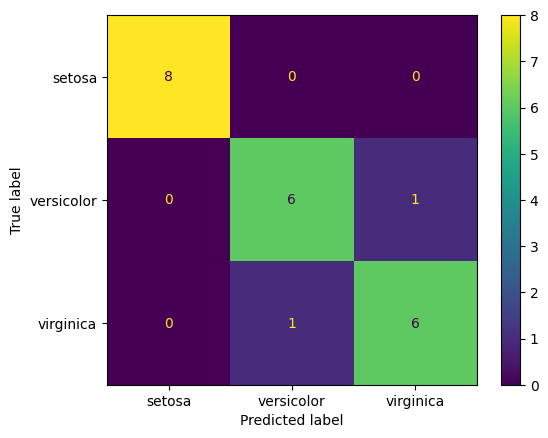

In [18]:
from torch import no_grad, argmax
from torch.nn import ReLU
from torch.optim import Adam
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

iris = load_iris()

# Dans ce dataset, il y a 150 cas, 4 features, 3 classes (setosa,
# versicolor, virginica), il y a 50 cas par classe (c'est donc
# équilibré), 4 features en entrée, 3 classes en sortie. Il faut
# utiliser la fonction softmax pour ce réseau de neurones.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

X, y = [tensor(a, dtype=b) for a, b in [(X_scaled, torch.float32), (iris.target, torch.long)]]

X_tr, X_temp, y_tr, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

datasets = [TensorDataset(a, b) for a, b in [(X_tr, y_tr), (X_val, y_val), (X_test, y_test)]]

tr_loader, val_loader, test_loader = [DataLoader(ds, batch_size=16, shuffle=val) for ds, val in zip(datasets, [True, False, False])]

class MLP(Module):
  def __init__(self, features, neurons, classes):
    super(MLP, self).__init__()
    self.fc1 = Linear(features, neurons)
    self.fc2 = Linear(neurons, classes)
    self.relu = ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    return self.fc2(x)

def compute_accuracy(logits, targets):
  # Argmax retourne l'indice de la classe avec le score le plus élevé
  pred = argmax(logits, dim=1)
  # Compare les éléments, les somme et retourne un chiffre
  correct = (pred == targets).sum().item()
  # Retourne la division de tous les termes correctes par le nombre
  # d'éléments dans le dataset de vérification.
  return correct/targets.size(0)

model = MLP(4, 50, 3)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-2)

for _ in range(200):
  model.train()
  for _, batch in enumerate(tr_loader):
    inputs, groundtruths = batch
    optimizer.zero_grad()
    loss = criterion(model(inputs), groundtruths)
    loss.backward()
    optimizer.step()
  
  model.eval()
  with no_grad():
    for _, batch in enumerate(val_loader):
      inputs, groundtruths = batch
      loss = criterion(model(inputs), groundtruths)

preds = []
targets = []

model.eval()
with no_grad():
  for _, batch in enumerate(test_loader):
    inputs, groundtruths = batch
    loss = criterion(model(inputs), groundtruths)

    # On ajoute aux listes (avec .cpu().numpy() pour sklearn)
    pred = torch.argmax(model(inputs), dim=1)
    preds.extend(pred.cpu().numpy())
    targets.extend(groundtruths.cpu().numpy())

print(compute_accuracy(model(inputs), groundtruths))
print(accuracy_score(targets, preds))

ConfusionMatrixDisplay.from_predictions(targets, preds, display_labels=iris.target_names)

In [19]:
# Exercice 2

Forme               → (569, 31)
Données             → 569
Features            → 30
Classes             → 2 : ['malignant' 'benign']
------------------------------------------------------------
benign              → 357 (62.7%)
malignant           → 212 (37.3%)
------------------------------------------------------------
Classe majoritaire  → benign (357)
Classe minoritaire  → malignant (212)
Ratio déséquilibre  → 1.68:1 → Légèrement déséquilibré

MÉTRIQUES FINALES SUR TOUT LE TEST SET (86 exemples) :
Accuracy  :  1.0000
Precision : 1.0000
Recall    : 1.0000
F1-score  : 1.0000



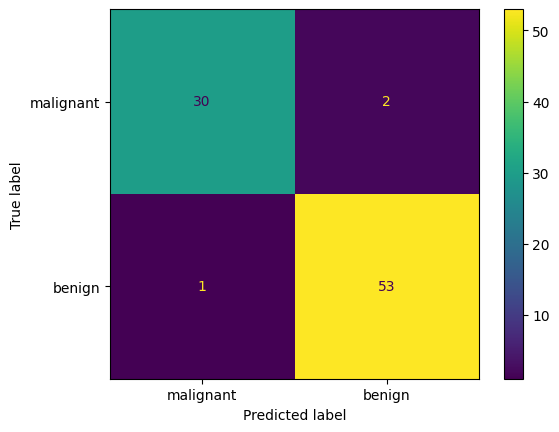

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from torch import tensor
import copy

bc = load_breast_cancer()
df = DataFrame(data=bc.data, columns=bc.feature_names)
df['target'] = [bc.target_names[i] for i in bc.target]

# ───────────────────── DIAGNOSTIC DE DATASET ─────────────────────
print("=" * 60)
print(f"Forme               → {df.shape}")
print(f"Données             → {len(df):,}")
# Permet de déterminer le # de neurones en entrée.
print(f'Features            → {df.shape[1]-1}')
# La méthode .nunique() retourne le nombre d'éléments uniques. La méthode
# .unique() retourne les éléments uniques dans un dataset. Le # de classes
# permet de déterminer le nombre de neurones en sortie.
print(f"Classes             → {df['target'].nunique()} : {df['target'].unique()}")
print("-" * 60)

# La méthode .value_counts() retourne le nombre d'éléments par valeur unique
# dans un ordre décroissant de fréquence d'apparition. Les valeurs sont associées
# aux nombres d'éléments.
counts = df['target'].value_counts()
# On déballe les éléments de counts, en le nom de la valeur unique (cls) et le
# nombre d'éléments par valeur unique (n).
for cls, n in counts.items():
    # :<19 veut dire : aligné à gauche (<), avec 19 espaces pour du texte. 5.1%
    # veut dire 5 caractères, 1 après le point, suivi d'un pourcent.
    print(f"{cls:<19} → {n:3} ({n/len(df):5.1%})")

print("-" * 60)
ratio = counts.max() / counts.min()
# .idx...() retourne le nom de la valeur unique, .max/min() la valeur max ou min
print(f"Classe majoritaire  → {counts.idxmax()} ({counts.max()})")
print(f"Classe minoritaire  → {counts.idxmin()} ({counts.min()})")
# Si le set de données est déséquilibré, utiliser le F1-score pour déterminer
# la véracité des prédictions du modèle.
print(f"Ratio déséquilibre  → {ratio:.2f}:1 →", 
      "DÉSEQUILIBRÉ" if ratio > 2 else "Légèrement déséquilibré" if ratio > 1.5 else "Équilibré")
print("=" * 60)
# ─────────────────────────────────────────────────────────────────

# Ne pas oublier de standardiser les données.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc.data)

# Cette écriture est préférable aux autres, qui peuvent faire planter le train_
# test_split, quand on transforme directement en tenseurs X et y.
X, y = X_scaled, bc.target

# Autre écriture plus compacte du data splicing, évitant beaucoup de répétitions.
# Permet aussi l'accès aux loaders via un tuple loaders, comme ceci : loaders[n],
# où n représente le loader souhaité, ici compris entre 0 et 2 (inclus).
split = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Le symbole * ici représente l'unpacking des données linéairement, et [1::2] est
# un slicing typique de python, le résultat de ceci veut dire : je commence à la
# position 1 de mon tuple split (0, 2, 3, sont les autres indices), avec un pas 
# de 2, et je sors leurs valeurs séparées par une virgule [split[1], split[3]], 
# qui correspondent à mes X_temp et Y_temp plus haut.
split_test = train_test_split(*split[1::2], test_size=0.5, stratify=split[3], random_state=42)

# Un peu de charabia supplémentaire, avec des tenseurs imbriqués dans un dataset 
# (lui aussi un tenseur), lui-même imbriqué dans un DataLoader, la sortie étant
# un tuple accessible dans les boucles.
loaders = [DataLoader(TensorDataset(tensor(a, dtype=torch.float32), tensor(b, dtype=torch.long)), batch_size=8, shuffle=val) 
           for a, b, val in [(*split[::2], True), (*split_test[::2], False), (*split_test[1::2], False)]]

class MLP(Module):
    def __init__(self, neurons, features, classes):
        super(MLP, self).__init__()
        self.fc1 = Linear(features, neurons)
        self.fc2 = Linear(neurons, classes)
        self.relu = ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

def compute_metrics(logits, targets):
    preds = argmax(logits, dim=1)
    
    # On passe tout en CPU + numpy pour éviter les bugs GPU/tensor
    preds = preds.cpu()
    targets = targets.cpu()
    
    # Classe positive = malignant (0) → convention médicale
    pos_label = 0
    
    tp = ((preds == pos_label) & (targets == pos_label)).sum().item()
    fp = ((preds == pos_label) & (targets != pos_label)).sum().item()
    fn = ((preds != pos_label) & (targets == pos_label)).sum().item()
    tn = ((preds != pos_label) & (targets != pos_label)).sum().item()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1        = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return accuracy, precision, recall, f1

# Le # de neurones peut être associé à ≈ 2 × batch_size
model = MLP(16, 30, 2)
# Utiliser l'entropie croisée comme fonction d'évaluation
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-2)

# Early stopping
patience = 15
best_loss = float('inf')
best_model = None
current_patience = 0

for _ in range(100):
    model.train()
    train_loss = 0.0
    for _, batch in enumerate(loaders[0]):
        inputs, groundtruths = batch
        optimizer.zero_grad()
        loss = criterion(model(inputs), groundtruths)
        loss.backward()
        optimizer.step()
        # Somme pondérée des loss de l'entraînement
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(loaders[0].dataset)
    
    model.eval()
    val_loss = 0.0
    with no_grad():
        for _, batch in enumerate(loaders[1]):
            inputs, groundtruths = batch
            loss = criterion(model(inputs), groundtruths)
            # Ce n'est pas une bonne idée de calculer la Validation
            # accuracy, le set est déséquilibré.
            # metrics = compute_metrics(model(inputs), groundtruths)
            # Somme pondérée des loss de la validation
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(loaders[1].dataset)

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        # Sauvegarde du meilleur modèle
        best_model = copy.deepcopy(model.state_dict())
        current_patience = 0
    else:
        current_patience += 1
        if current_patience > patience:
            break

preds = []
targets = []

# Chargement du meilleur modèle de la phase d'entrainement.
model.load_state_dict(best_model)
model.eval()
with no_grad():
    # Pas de boucle pour faire plusieurs itérations, seulement une seule
    # puisque nous évaluons uniquement sur le meilleur modèle sauvegardé.
    for _, batch in enumerate(loaders[2]):
        inputs, groundtruths = batch
        loss = criterion(model(inputs), groundtruths)
        pred = argmax(model(inputs), dim=1)
        preds.extend(pred.cpu().numpy())
        targets.extend(groundtruths.cpu().numpy())
    
    accuracy, precision, recall, f1 = compute_metrics(model(inputs), groundtruths)
    print(f"\nMÉTRIQUES FINALES SUR TOUT LE TEST SET ({len(targets)} exemples) :")
    print(f"Accuracy  : {accuracy: .4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-score  : {f1:.4f}\n")

    ConfusionMatrixDisplay.from_predictions(targets, preds, display_labels=bc.target_names)